# **1. Perkenalan Dataset**


Dataset yang digunakan pada eksperimen ini adalah **Heart Failure Prediction** yang diambil dari Kaggle. Dataset ini berisi data pasien yang digunakan untuk memprediksi kemungkinan terjadinya gagal jantung berdasarkan beberapa fitur klinis seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, tipe nyeri dada, dan lain-lain. Dataset ini terdiri dari data numerik dan kategorikal yang dapat digunakan untuk membangun model prediksi kesehatan jantung.

**Sumber dataset:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# **2. Import Library**

Pada bagian ini, akan dilakukan import beberapa library utama yang digunakan dalam proses analisis data dan machine learning, yaitu:
- **pandas** untuk manipulasi dan analisis data,
- **scikit-learn** untuk preprocessing data seperti normalisasi dan encoding,
- **matplotlib** dan **seaborn** untuk visualisasi data.

Library-library ini sangat penting untuk membantu proses eksplorasi, pembersihan, dan pemodelan data secara efisien.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **3. Memuat Dataset**

Pada bagian ini, dataset akan dimuat ke dalam notebook menggunakan library pandas. Proses ini penting untuk memastikan data dapat diakses dan dianalisis lebih lanjut. Setelah data dimuat, beberapa baris awal akan ditampilkan untuk memastikan data telah terbaca dengan benar dan memahami struktur dataset yang digunakan.

In [2]:
df = pd.read_csv('../heart_raw.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# tampilkan nilai unik dari kolom object
for col in df.select_dtypes(include=['object']):
    print(f"Kolom {col}:")
    print(df[col].unique())
    print()

Kolom Sex:
['M' 'F']

Kolom ChestPainType:
['ATA' 'NAP' 'ASY' 'TA']

Kolom RestingECG:
['Normal' 'ST' 'LVH']

Kolom ExerciseAngina:
['N' 'Y']

Kolom ST_Slope:
['Up' 'Flat' 'Down']



Penjelasan struktur dataset:

- **Age**: Usia pasien (numerik).
- **Sex**: Jenis kelamin pasien (kategorikal: 'M' atau 'F').
- **ChestPainType**: Tipe nyeri dada yang dialami pasien (kategorikal: misal 'ATA', 'NAP', 'ASY', 'TA').
- **RestingBP**: Tekanan darah saat istirahat (numerik).
- **Cholesterol**: Kadar kolesterol dalam darah (numerik).
- **FastingBS**: Kadar gula darah puasa (numerik, 1 jika >120 mg/dl, 0 jika tidak).
- **RestingECG**: Hasil pemeriksaan EKG saat istirahat (kategorikal).
- **MaxHR**: Detak jantung maksimum yang dicapai (numerik).
- **ExerciseAngina**: Angina yang dipicu oleh olahraga (kategorikal: 'Y' atau 'N').
- **Oldpeak**: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat (numerik, float).
- **ST_Slope**: Kemiringan segmen ST pada EKG (kategorikal).
- **HeartDisease**: Target/label, 1 jika terindikasi penyakit jantung, 0 jika tidak (numerik/biner).

Setiap kolom memiliki 918 data (tidak ada missing value), dengan kombinasi fitur numerik dan kategorikal yang dapat digunakan untuk analisis prediksi penyakit jantung.

## Kualitas Dataset

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

### Analisis Statistik Deskriptif

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Berdasarkan hasil statistik deskriptif untuk kolom-kolom numerikal dalam dataset, berikut adalah interpretasinya:
1. **Age**
    * Usia pasien bervariasi antara 28 hingga 77 tahun dengan rata-rata usia 53,51 tahun.
    * Sebagian besar pasien berada di rentang usia 47 hingga 60 tahun.
2. **RestingBP**
    * Tekanan darah saat istirahat berkisar antara 0 hingga 200 mmHg dengan rata-rata 132,40 mmHg.
    * Sebagian besar pasien memiliki tekanan darah antara 120 hingga 140 mmHg.
3. **Cholesterol**
    * Kadar kolesterol dalam darah berkisar antara 0 hingga 603 mg/dL dengan rata-rata 198,80 mg/dL.
    * Sebagian besar pasien memiliki kadar kolesterol antara 173 hingga 267 mg/dL.
4. **FastingBS**
    * Kadar gula darah puasa memiliki nilai biner 0 atau 1, dengan rata-rata 0,23.
    * Sekitar 23% pasien memiliki kadar gula puasa lebih dari 120 mg/dL.
5. **MaxHR**
    * Detak jantung maksimum berkisar antara 60 hingga 202 denyut per menit dengan rata-rata 136,81 denyut.
    * Mayoritas pasien memiliki detak jantung maksimum antara 120 hingga 156 denyut per menit.
6. **HeartDisease**
    * Sekitar 55% pasien (rata-rata 0,55) terindikasi memiliki penyakit jantung.
    * Dataset cukup seimbang antara pasien dengan dan tanpa penyakit jantung.


In [8]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Sedangkan untuk kolom kategori, berikut hasil statistik deskriptif.

1. **Sex**
    * Terdapat 2 kategori jenis kelamin pasien, yaitu laki-laki (M) dan perempuan (F).
    * Mayoritas pasien memiliki jenis kelamin laki-laki, yaitu sebanyak 725 pasien.

2. **ChestPainType**
    * Terdapat 4 jenis tipe nyeri dada yang dialami pasien: 'ATA', 'NAP', 'ASY', dan 'TA'.
    * Tipe nyeri dada yang paling umum dijumpai adalah ASY dengan 496 kasus.

3. **RestingECG**
    * Terdapat 3 kategori hasil EKG saat istirahat: misalnya 'Normal', 'ST', dan 'LVH' (asumsi umum jika tidak terlihat jelas).
    * Kategori yang paling banyak muncul adalah 'Normal' dengan 552 pasien.

4. **ExerciseAngina**
    * Merupakan variabel biner dengan 2 kategori: 'Y' (ya) dan 'N' (tidak).
    * Sebagian besar pasien tidak mengalami angina saat olahraga, sebanyak 547 kasus.

5. **ST_Slope**
    * Terdapat 3 kategori untuk kemiringan segmen ST pada EKG: misalnya 'Flat', 'Up', dan 'Down' (asumsi umum).
    * Kategori yang paling umum adalah 'Flat', yang dialami oleh 460 pasien.


### Analisis Univariat

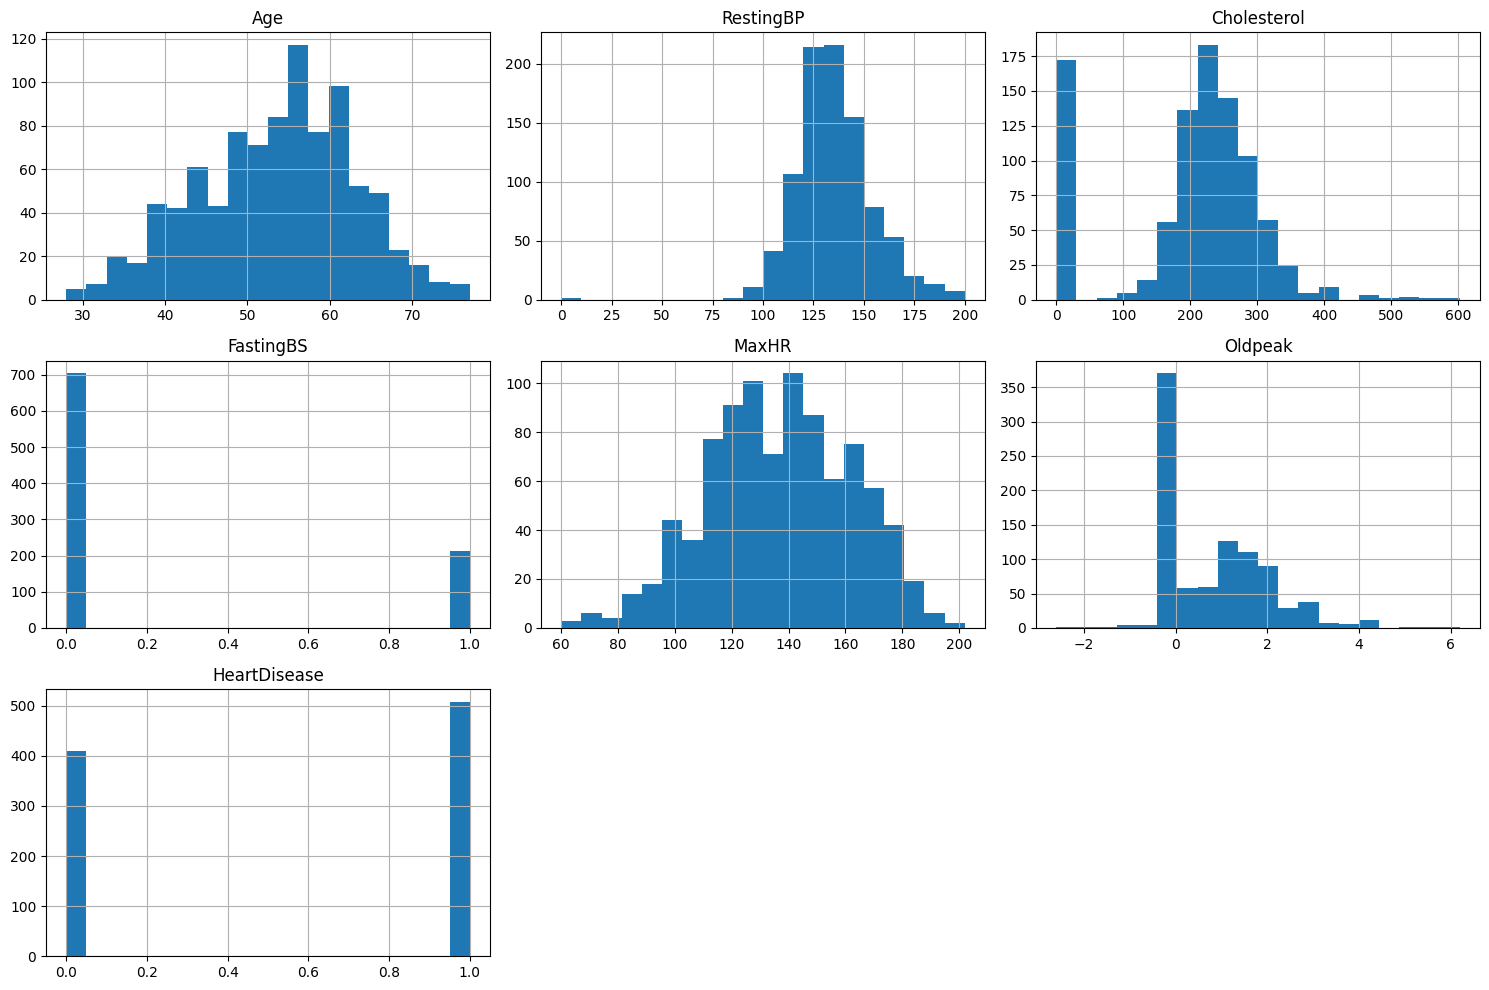

In [9]:
# Analisis univariat fitur numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

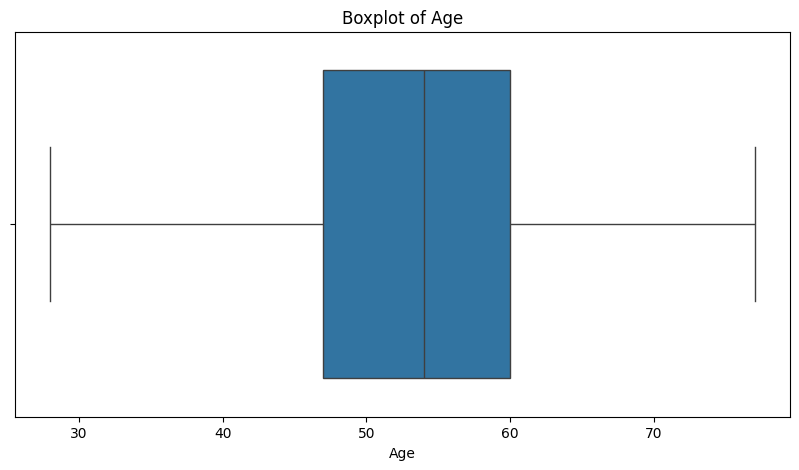

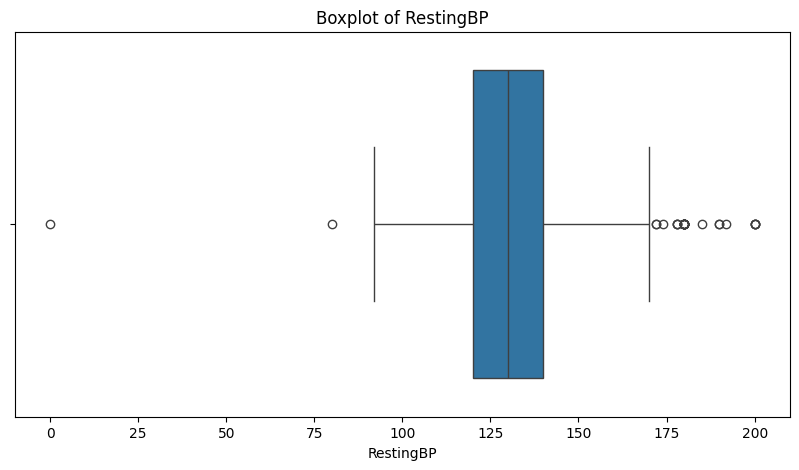

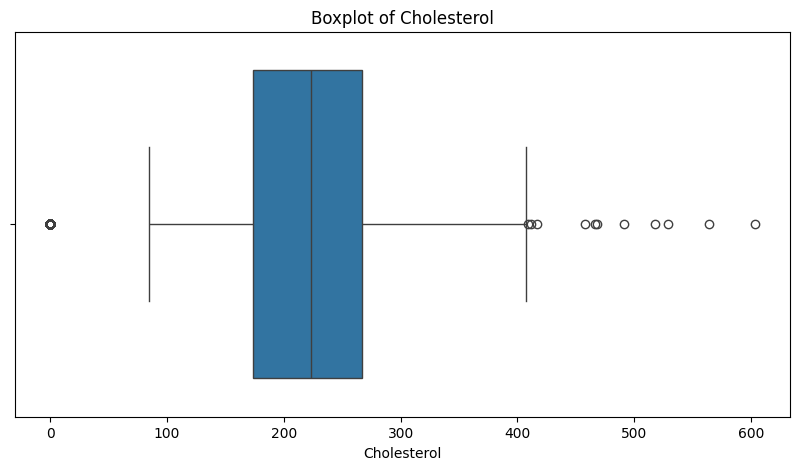

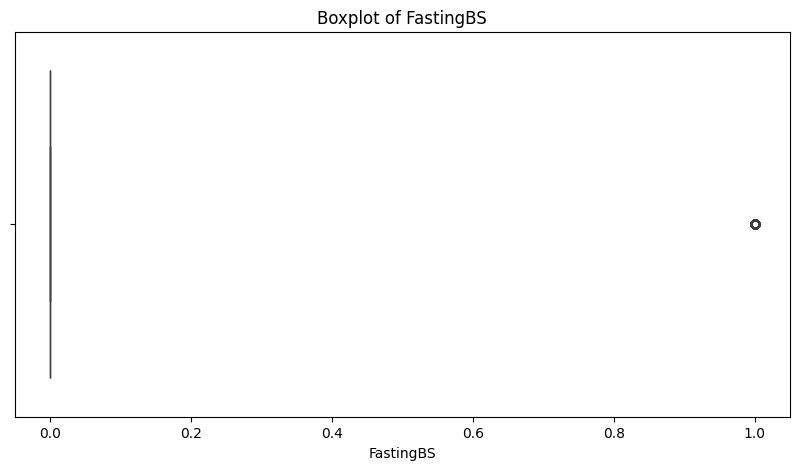

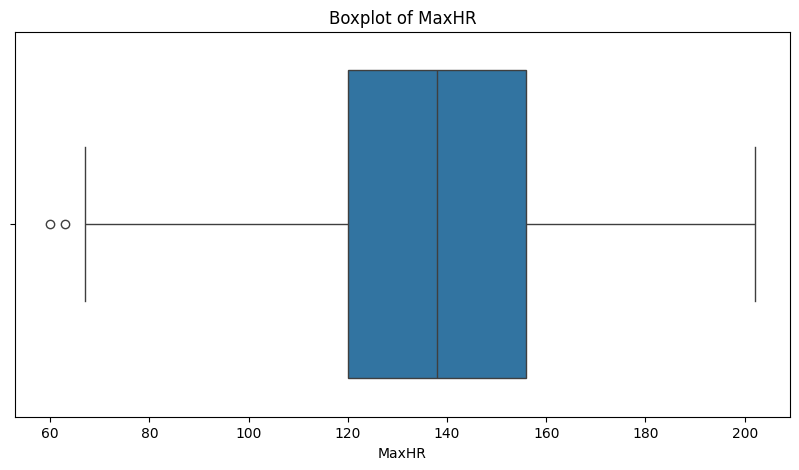

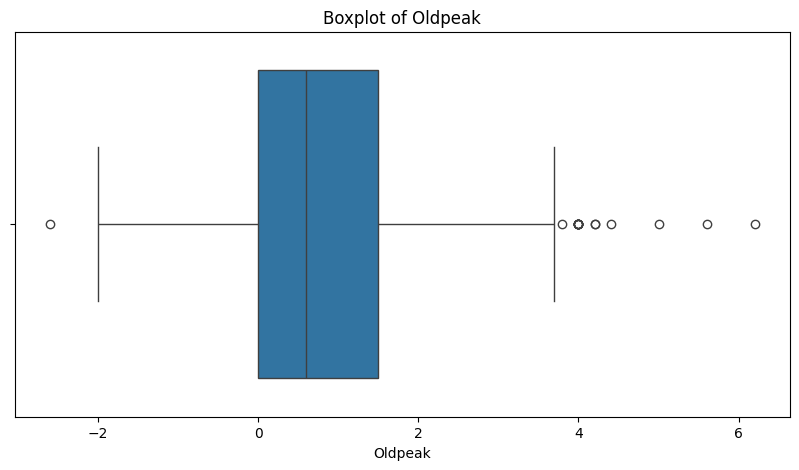

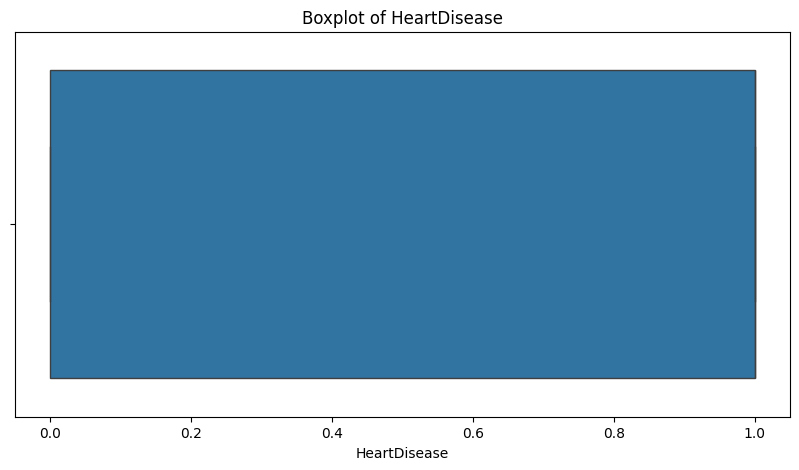

In [10]:
# Analisis univariat fitur numerik menggunakan boxplot
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

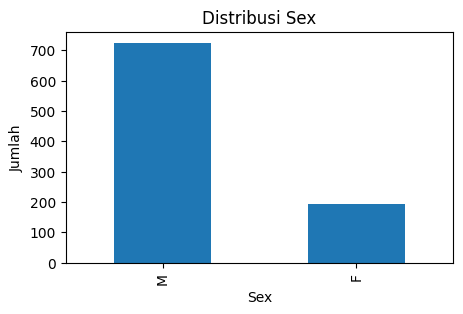

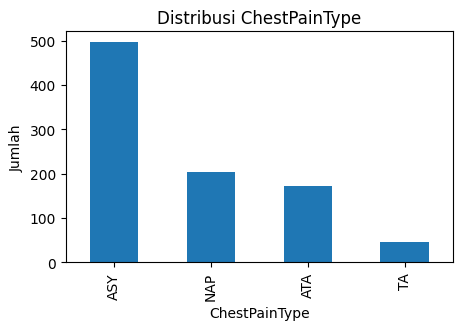

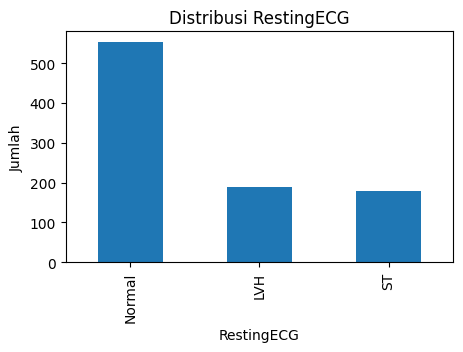

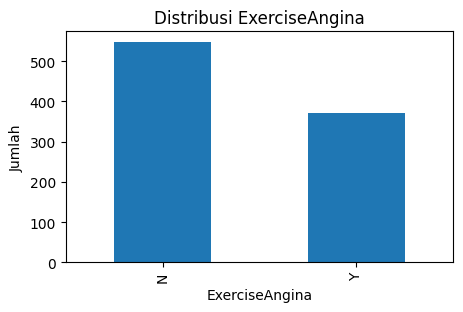

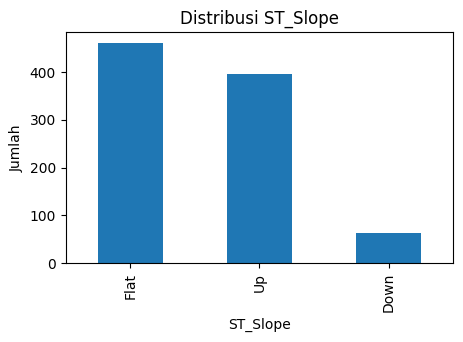

In [11]:
# Analisis univariat fitur kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.show()

### Analisis Bivariat

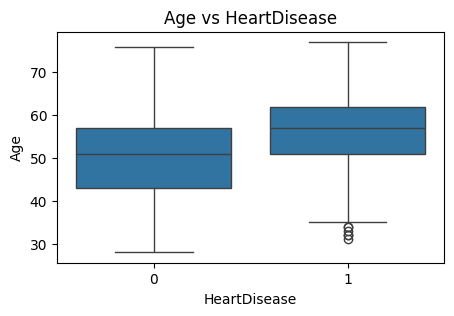

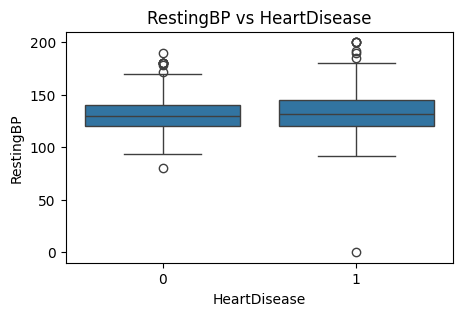

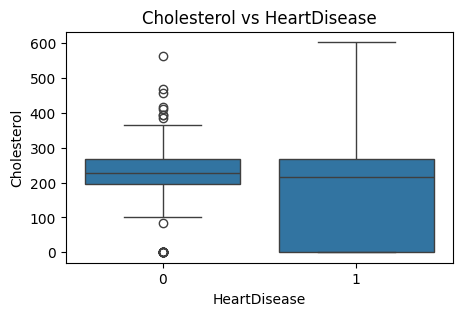

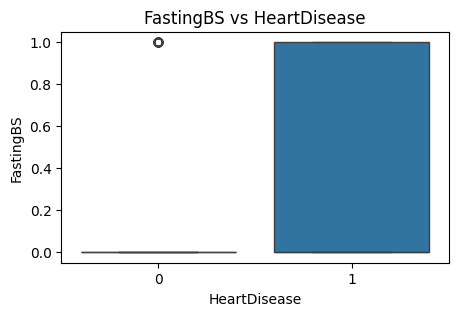

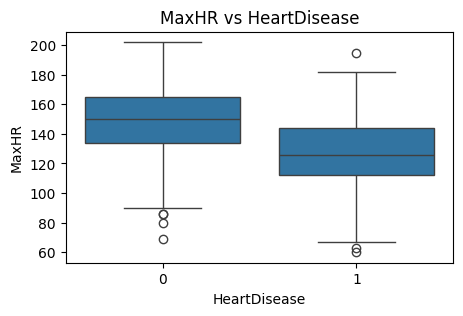

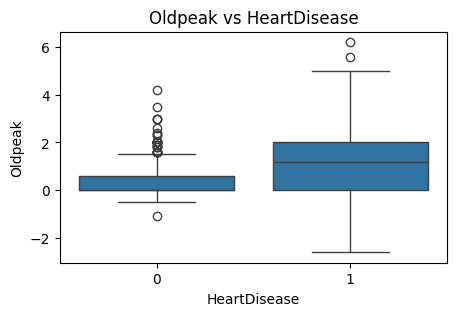

In [12]:
# Analisis bivariat antara fitur numerik dan target (misal: 'HeartDisease')
target_col = 'HeartDisease' if 'HeartDisease' in df.columns else df.columns[-1]

# Boxplot fitur numerik terhadap target
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(5,3))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs {target_col}')
        plt.show()

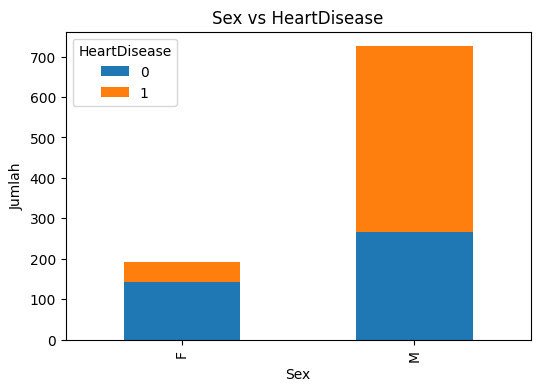

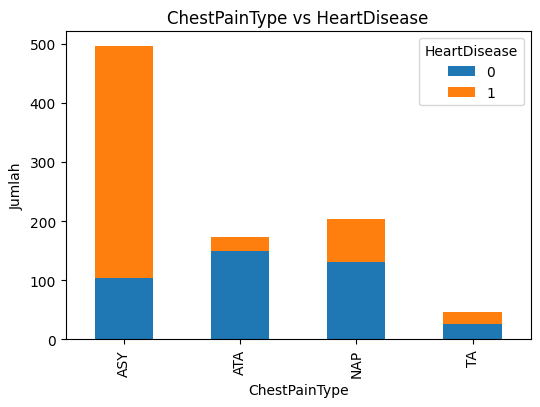

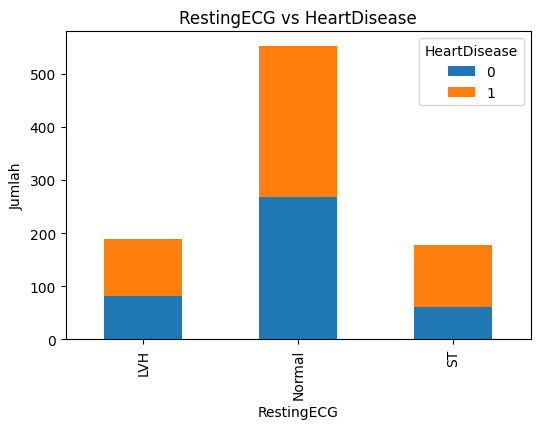

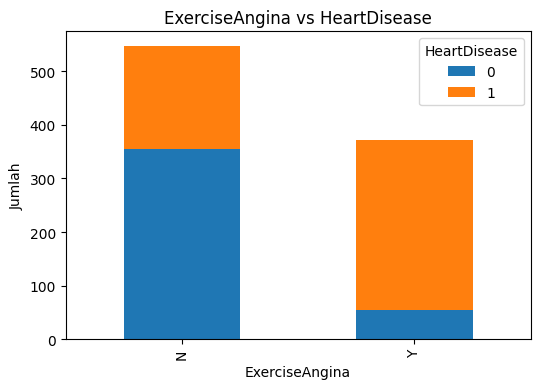

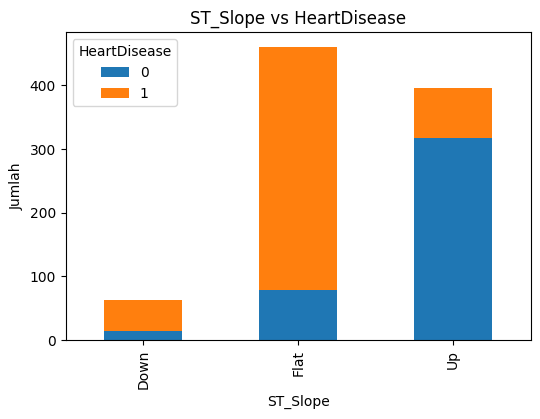

In [13]:
# Crosstab fitur kategorial terhadap target
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    ct = pd.crosstab(df[col], df[target_col])
    ct.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f'{col} vs {target_col}')
    plt.ylabel('Jumlah')
    plt.show()

### Analisis Multivariat

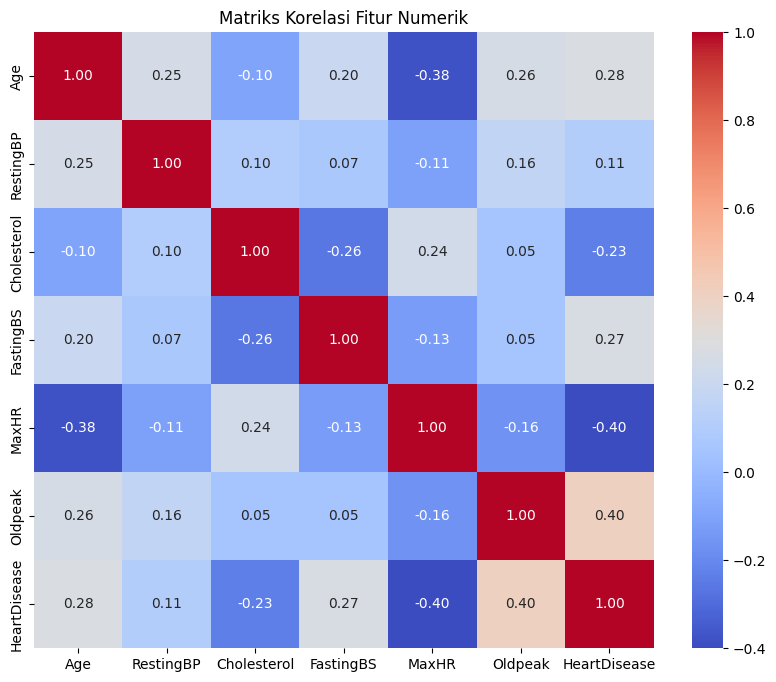

In [14]:
# Analisis multivariat: Korelasi antar fitur numerik dan visualisasi pairplot

# Korelasi matriks
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

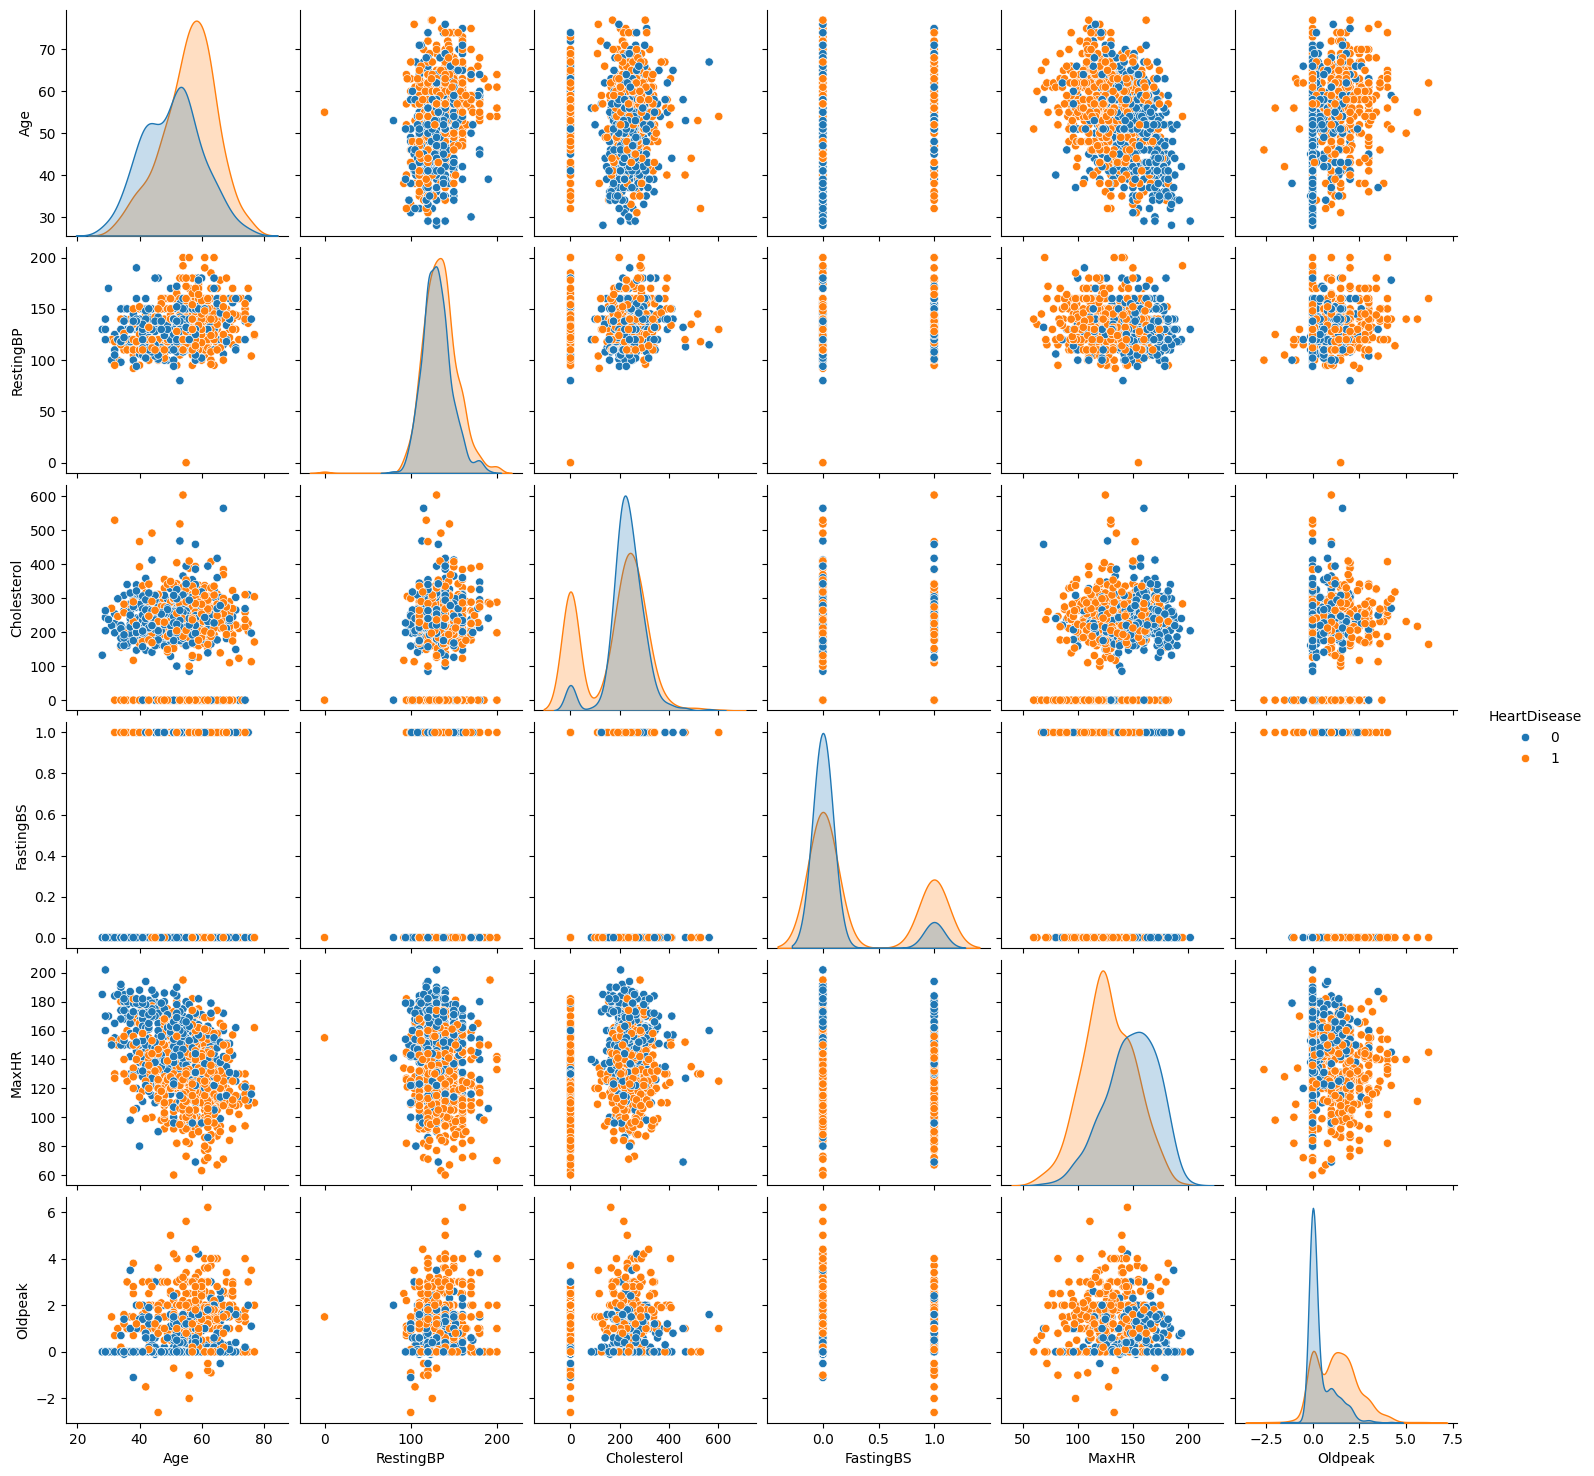

In [15]:
# Pairplot untuk beberapa fitur utama dan target (jika dataset tidak terlalu besar)
# Ganti 'HeartDisease' dengan nama kolom target jika berbeda
target_col = 'HeartDisease' if 'HeartDisease' in df.columns else df.columns[-1]
selected_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
if target_col not in selected_cols:
    selected_cols.append(target_col)
sns.pairplot(df[selected_cols], hue=target_col)
plt.show()

### Insight Preprocessing
* Dataset tidak memiliki missing value dan data duplikat.
* Nilai 0 pada kolom `Cholesterol` mencurigakan dan bisa jadi merupakan missing value.
* Nilai negatif pada kolom `Oldpeak` bisa menjadi indikasi outlier atau kesalahan input.
* Tahapan preprocessing yang perlu dilakukan adalah:
    - Menangani outlier / data tidak valid pada kolom `Cholesterol` dan `Oldpeak`.
    - Melakukan feature scaling untuk kolom-kolom numerik.
    - Melakukan label encoder untuk kolom-kolom kategori.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# salin dataframe untuk preprocessing
clean_df = df.copy()

In [17]:
# penanganan outliers
# Menggunakan IQR untuk mendeteksi dan menangani outlier pada kolom numerik
outlier_columns = ['Cholesterol', 'Oldpeak']

Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan batas bawah/atas (winsorizing)
for col in outlier_columns:
   df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
   df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

In [18]:
# select numeric column
numeric_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns

# feature scaling
scaler = MinMaxScaler()
for col in numeric_cols:
    clean_df[col] = scaler.fit_transform(clean_df[[col]])

In [19]:
# Label Encoding untuk multi kategori

label_encoders = {}
for col in clean_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    clean_df[col] = le.fit_transform(clean_df[col])
    label_encoders[col] = le

clean_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0.0,1,0.788732,0,0.295455,2,0.0
1,0.428571,0,2,0.80,0.298507,0.0,1,0.676056,0,0.409091,1,1.0
2,0.183673,1,1,0.65,0.469320,0.0,2,0.267606,0,0.295455,2,0.0
3,0.408163,0,0,0.69,0.354892,0.0,1,0.338028,1,0.465909,1,1.0
4,0.530612,1,2,0.75,0.323383,0.0,1,0.436620,0,0.295455,2,0.0


In [20]:
clean_df.to_csv('heart_preprocessing/heart_eksperimen_output.csv', index=False)